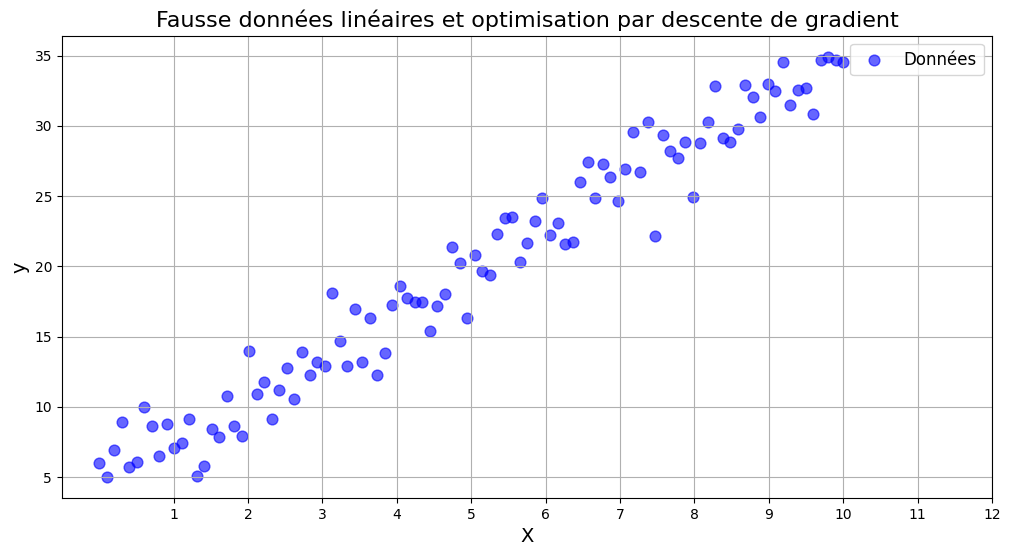

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

# Charger les données depuis un fichier CSV dans un DataFrame
df = pd.read_csv('linear_fake_data.csv')

# Créer la figure pour l'affichage
def plot_data():
    plt.figure(figsize=(12, 6))
    plt.scatter(df['X'], df['y'], alpha=0.6, c='b', s=60, label='Données')
    plt.title('Fausse données linéaires et optimisation par descente de gradient', fontsize=16)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.legend(fontsize=12)
    
plot_data()

# Affichage du nuage de point seul
plt.show()


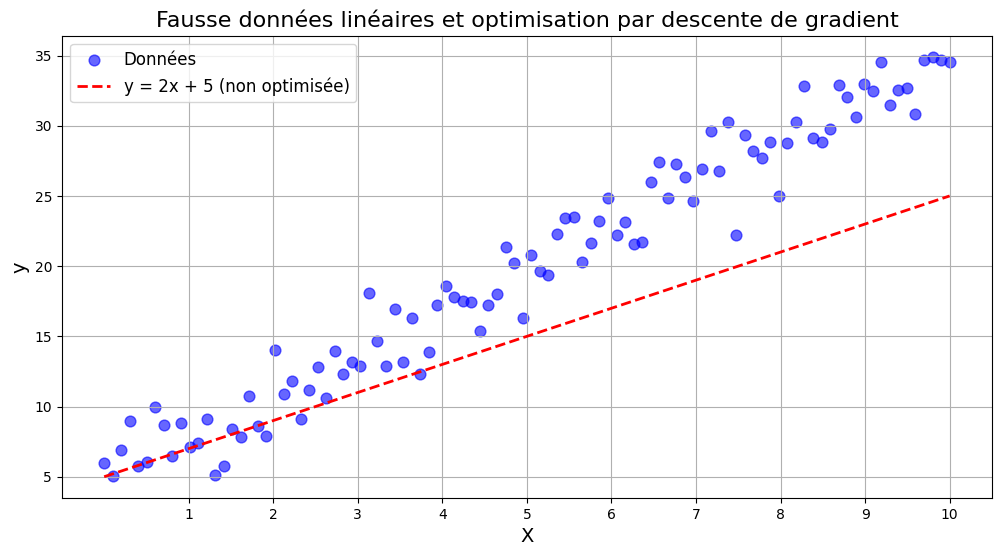

In [38]:
# Initialiser les paramètres a et b de la droite y = ax + b
a = 2
b = 5

# Définir une fonction linéaire f(x) qui représente la prédiction de y en fonction de x
def f(x):
    return a*x + b

plot_data()

# Tracer la première droite y = 2x + 5 (non optimisée) en rouge avec une légende explicite
def plot_line():
    plt.plot(df['X'], f(df['X']), c='r', linewidth=2, linestyle='--', label='y = 2x + 5 (non optimisée)')
    plt.legend(fontsize=12)

plot_line()
plt.show()

MSE: 35.20304230267804
RMSE: 5.933215174142772
a optimisé: 3.0214594348385697
b optimisé: 4.695123775619655
Le MSE après optimisation: 3.2600403113730185
Le RMSE après optimisation: 1.8055581716945646


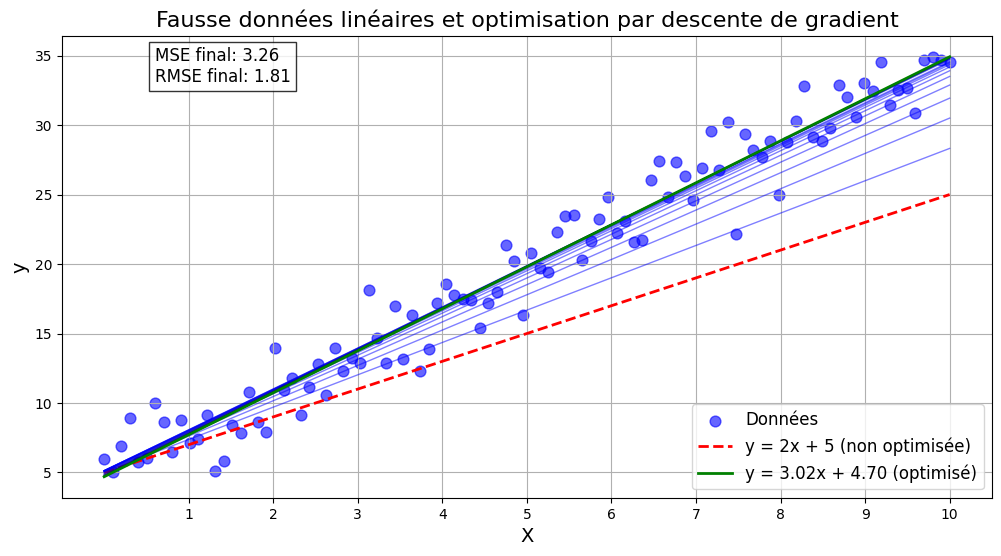

In [39]:
plot_data()
plot_line()

# Définir les fonctions pour calculer l'erreur quadratique moyenne (MSE) et racine carrée de MSE (RMSE)
def mse(a, b):
    return sum((f(df['X']) - df['y'])**2) / len(df)

def rmse(a, b):
    return sqrt(mse(a, b))

# Afficher les valeurs initiales de MSE et RMSE
print('MSE:', mse(a, b))
print('RMSE:', rmse(a, b))

# Descente de gradient pour minimiser l'erreur quadratique (MSE)
learning_rate = 0.005  # Taux d'apprentissage pour la descente de gradient
epochs = 1000  # Nombre d'itérations

# Fonction pour générer un dégradé de couleur pour chaque itération
def get_color_gradient(n, start_color=(0, 0, 1), end_color=(0, 0, 0)):
    return [(start_color[0] + (end_color[0] - start_color[0]) * i / n,
             start_color[1] + (end_color[1] - start_color[1]) * i / n,
             start_color[2] + (end_color[2] - start_color[2]) * i / n) for i in range(n)]

# Générer un dégradé de couleurs pour visualiser la progression des itérations
colors = get_color_gradient(epochs)

# Boucle de descente de gradient pour ajuster a et b et minimiser l'erreur
for i in range(epochs):
    y_pred = f(df['X'])
    error = y_pred - df['y']
    a_gradient = (2/len(df)) * sum(error * df['X'])
    b_gradient = (2/len(df)) * sum(error)
    a -= learning_rate * a_gradient
    b -= learning_rate * b_gradient
    
    # Afficher chaque étape au début, puis une étape sur 100 plus tard pour une meilleure lisibilité
    if i < 10 or i % 100 == 0:
        plt.plot(df['X'], f(df['X']), c=colors[i], alpha=0.5, linewidth=1)

# Afficher les valeurs de a et b après optimisation
print('a optimisé:', a)
print('b optimisé:', b)
print('Le MSE après optimisation:', mse(a, b))
print('Le RMSE après optimisation:', rmse(a, b))

# Tracer la dernière droite optimisée en vert
plt.plot(df['X'], f(df['X']), c='g', linewidth=2, label=f'y = {a:.2f}x + {b:.2f} (optimisé)')

# Ajouter une annotation pour les valeurs finales de MSE et RMSE
plt.text(0.1, 0.9, f'MSE final: {mse(a, b):.2f}\nRMSE final: {rmse(a, b):.2f}', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Afficher la légende et le graphique
plt.legend(fontsize=12)
plt.show()

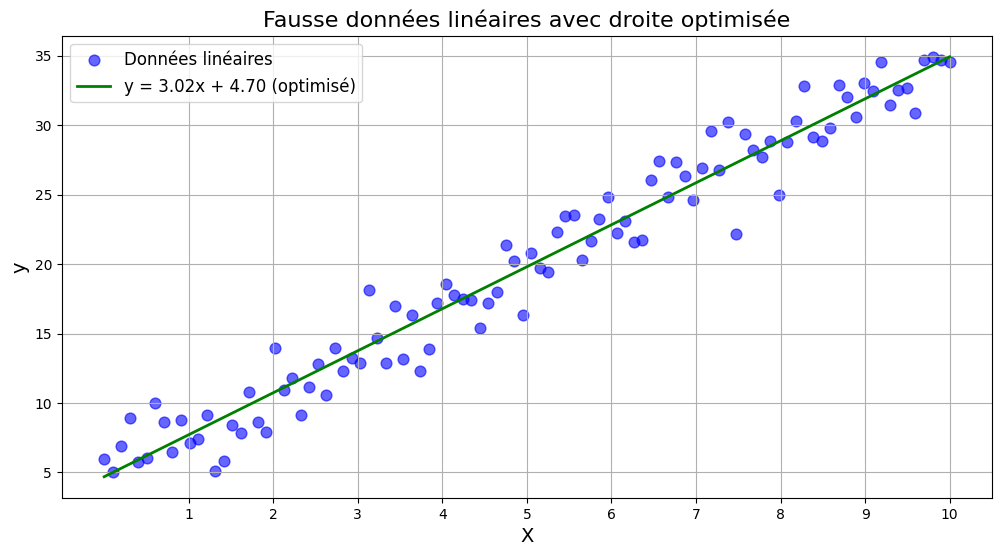

In [40]:
# Afficher la droite optimisée avec les points de données, avec une meilleure lisibilité
plt.figure(figsize=(12, 6))  # Créer une figure avec une taille spécifique

# Tracer les points de données en bleu, avec une taille plus grande
plt.scatter(df['X'], df['y'], alpha=0.6, c='b', s=60, label='Données linéaires')

# Ajouter un titre et des labels pour les axes, avec une police plus grande
plt.title('Fausse données linéaires avec droite optimisée', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xticks(range(1, 13))
plt.grid(True)

# Tracer la droite optimisée en vert avec une épaisseur de ligne plus grande
plt.plot(df['X'], f(df['X']), c='g', linewidth=2, label=f'y = {a:.2f}x + {b:.2f} (optimisé)')

# Afficher la légende avec une taille de police plus grande
plt.legend(fontsize=12)
plt.show()